# Lab 2: More ggplot and dplyr


Brian Manzo (Thanks to Jing Ouyang for helping prepare lab materials)

Wednesday 8:30-9:50am, 2260 USB

## Preliminaries

1. We encourage you to be active on Piazza, asking and answering questions about homework and course material.
    - When asking a homework question, gather all relevant information to your problem to make it *reproduceable*
        - What operating system are you using (Windows/Mac)
        - What version of R are you using?
        - What versions of packages are you using? (run `sessionInfo()` after loading packages to see)
        - What code did you run before running into your problem?
        - What does the output say?
        - Take a screenshot or picture for best results
2. Demo on homework submission.
3. Final project discussion.

In [1]:
library(tidyverse) # load tidyverse

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


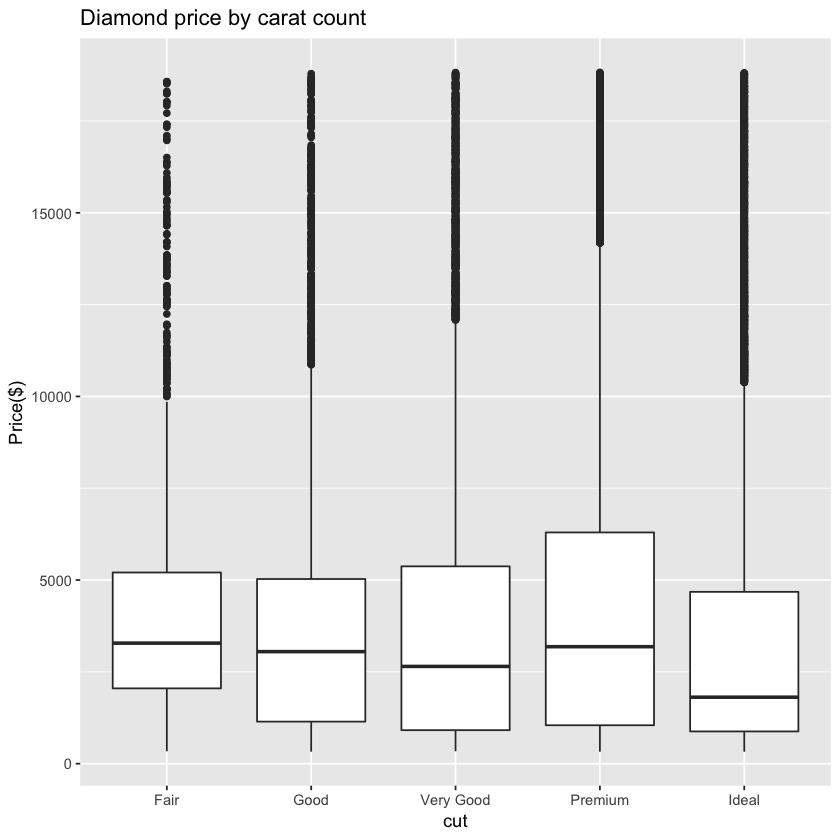

In [2]:
# boxplot helps to visualize the variability of a price for each cut
ggplot(data = diamonds) + 
    geom_boxplot(mapping = aes(x = cut, y = price)) +
    labs(x = 'cut', y = 'Price($)') + 
    ggtitle('Diamond price by carat count')

### Facets

Facets are useful if we want more segmented plots

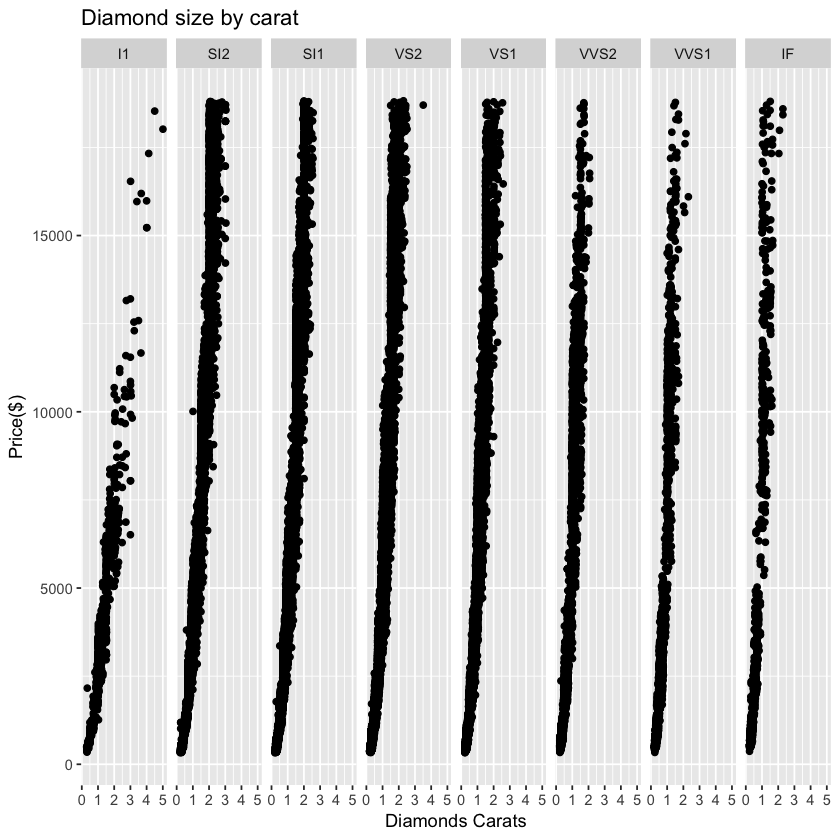

In [3]:
ggplot(data = diamonds) + 
    geom_point(mapping = aes(x = carat, y = price)) +
    labs(x = 'Diamonds Carats', y = 'Price($)') +
    ggtitle('Diamond size by carat') + 
    facet_grid(.~clarity) 

## Subset generation

Often it is useful to look at a subset of your data when the dataset is large

In [4]:
rand_idx = sample(1:nrow(diamonds), size=5000, replace=FALSE) # take ~10% of the data
dm = diamonds[rand_idx, ]
print(names(dm))
print(dim(dm))

 [1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"      
[1] 5000   10


In [5]:
summary(dm)

     carat              cut       color       clarity         depth      
 Min.   :0.220   Fair     : 122   D: 630   SI1    :1237   Min.   :54.70  
 1st Qu.:0.400   Good     : 446   E: 906   VS2    :1128   1st Qu.:61.10  
 Median :0.700   Very Good:1064   F: 890   SI2    : 807   Median :61.90  
 Mean   :0.788   Premium  :1306   G:1062   VS1    : 778   Mean   :61.76  
 3rd Qu.:1.040   Ideal    :2062   H: 748   VVS2   : 475   3rd Qu.:62.50  
 Max.   :3.010                    I: 506   VVS1   : 330   Max.   :71.30  
                                  J: 258   (Other): 245                  
     table           price               x              y        
 Min.   :49.00   Min.   :  337.0   Min.   :3.83   Min.   :3.780  
 1st Qu.:56.00   1st Qu.:  937.5   1st Qu.:4.70   1st Qu.:4.710  
 Median :57.00   Median : 2370.5   Median :5.67   Median :5.685  
 Mean   :57.39   Mean   : 3872.5   Mean   :5.71   Mean   :5.713  
 3rd Qu.:59.00   3rd Qu.: 5198.2   3rd Qu.:6.53   3rd Qu.:6.510  
 Max.   :69.

How does this compare to the full data?

In [6]:
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

## More about Facets

![Caption for the picture.](./graph1.png)

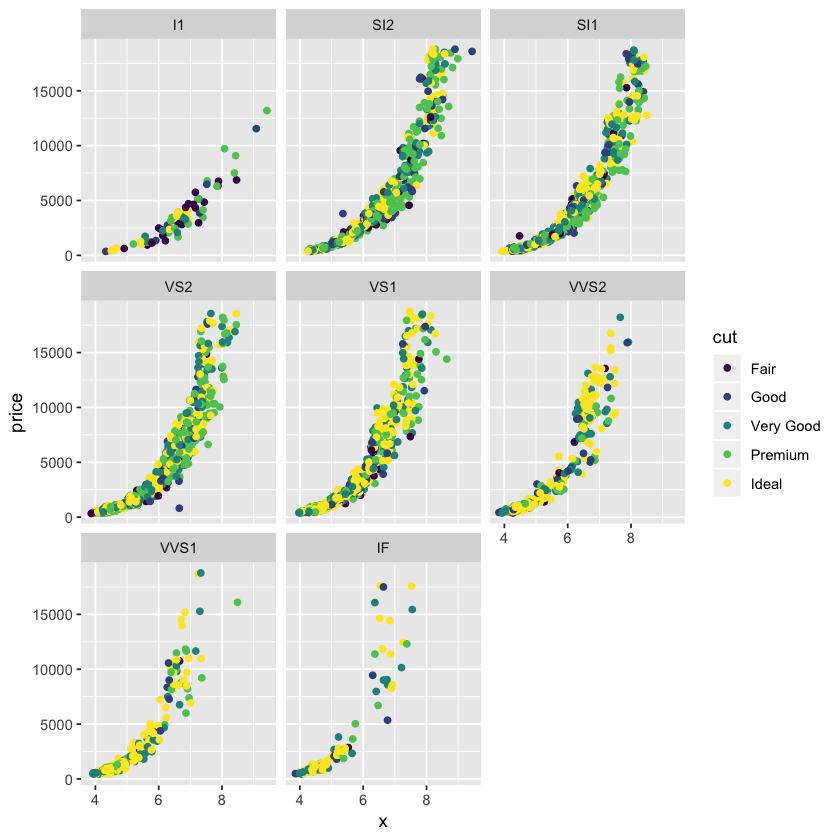

In [7]:
p1 = ggplot(data = dm) + 
    geom_point(mapping = aes(x = x, y = price, color = cut)) + 
    facet_wrap(~clarity)
print(p1)

## geom_smooth

We might be interested in seeing trends in the data that we have.`geom_smooth` uses local polynomial regression or generalized additive models to plot the smoothed conditional mean of the data, within standard error bounds. 

![Caption for the picture.](./graph2.png)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


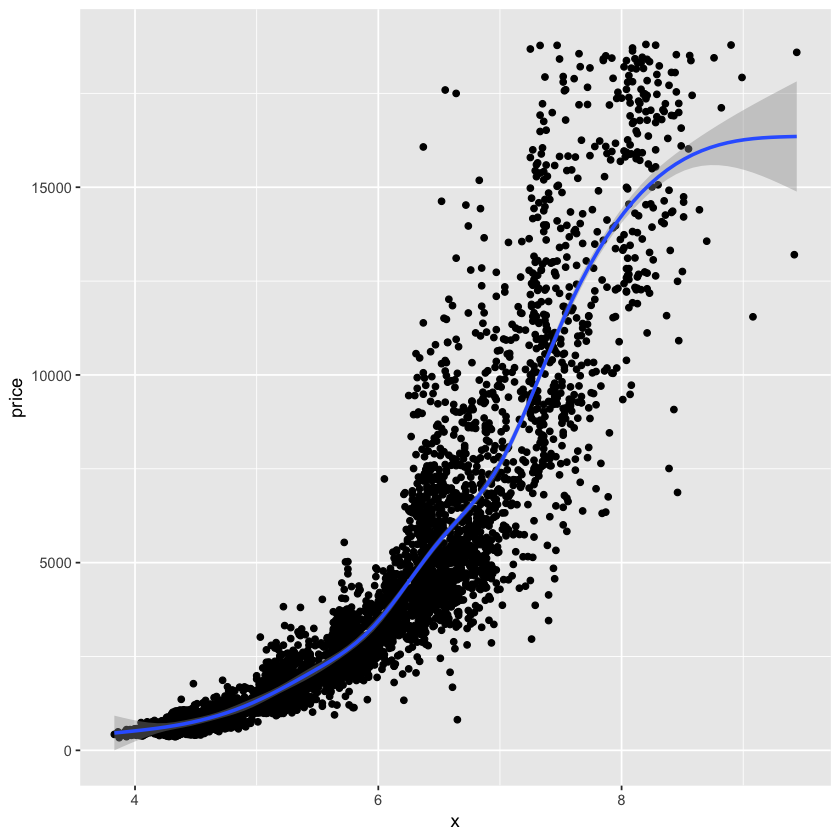

In [8]:
p2 = ggplot(data = dm) + 
    geom_point(mapping = aes(x = x, y = price)) +
    geom_smooth(mapping = aes(x = x, y = price))
print(p2)

How to reduce the code duplication above? `(x=x, y=price)` is in both lines. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


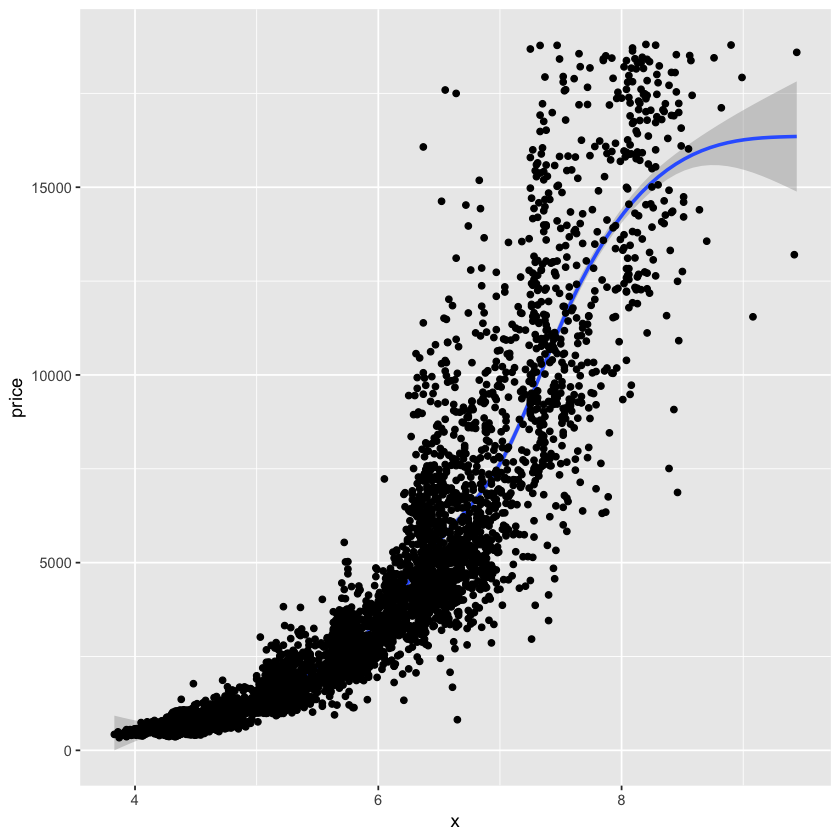

In [9]:
ggplot(data = dm, mapping = aes(x = x, y= price)) + 
  geom_smooth() +   geom_point()

## Geometric Plots

Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot.

You can learn which stat a geom uses by inspecting the default value for the 'stat' argument. For example, `?geom_bar` shows that the default value for stat is 'count', which means that `geom_bar()` uses `stat_count()`.

`stat_count()` is documented on the same page as `geom_bar()`, and if you scroll down you can find a section called "computed variables." That describes how it computes two new variables: count and prop.

Let's use the following case where we override the default stat and instead want to use a value within the dataset of the y-axis (instead of a count).

In [11]:
popn <- tribble(
~country, ~population,
"ETHIOPIA", 102000000,
"NIGERIA", 186000000,
"EGYPT", 96000000,
"DR CONGO", 78000000,
"SOUTH AFRICA", 56000000
)

![Caption for the picture.](./graph5.png)

$title
[1] "Most populous countries in Africa"

attr(,"class")
[1] "labels"

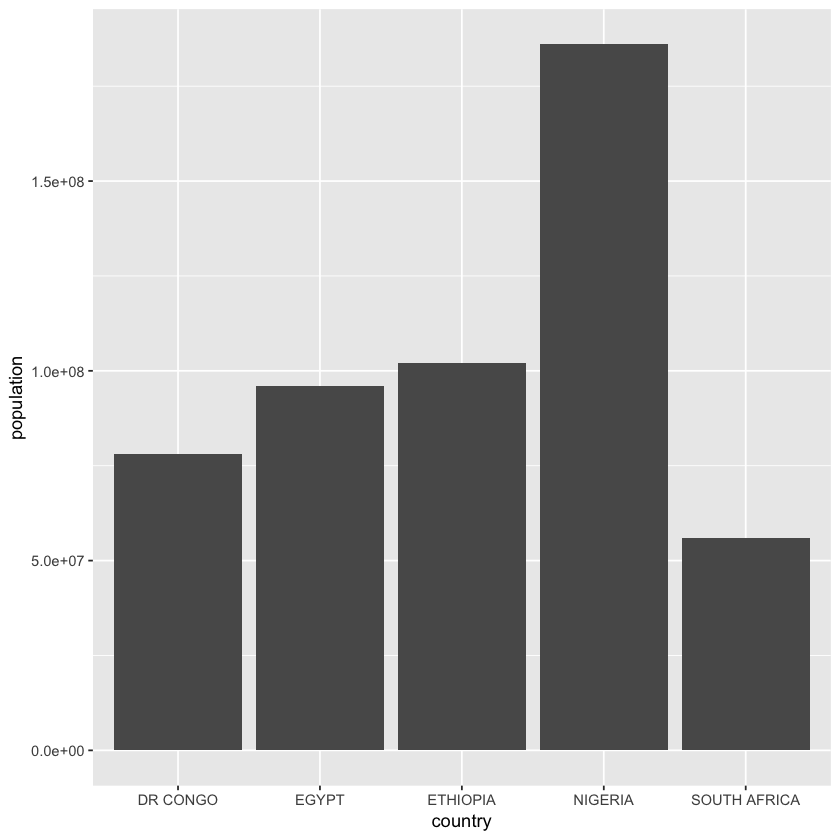

In [12]:
ggplot(data = popn) +
  geom_bar(mapping = aes(x = country, y = population), stat = "identity")
  ggtitle('Most populous countries in Africa')

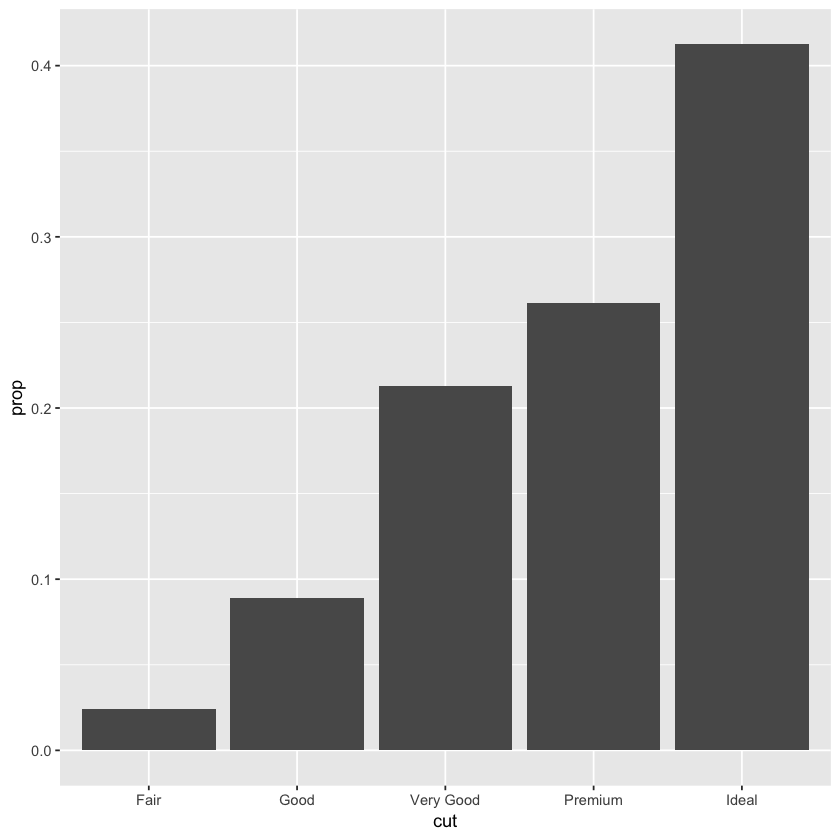

In [13]:
ggplot(data = dm) + 
    geom_bar(mapping = aes(x=cut, y=..prop.., group=1))

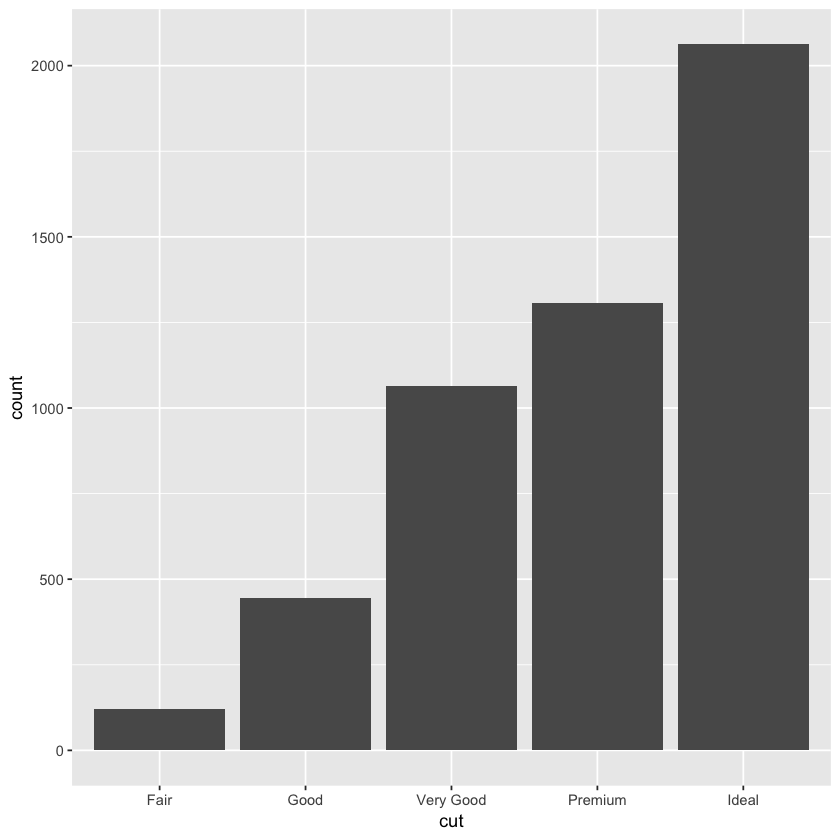

In [14]:
ggplot(data = dm) +
    stat_count(mapping = aes(x = cut))

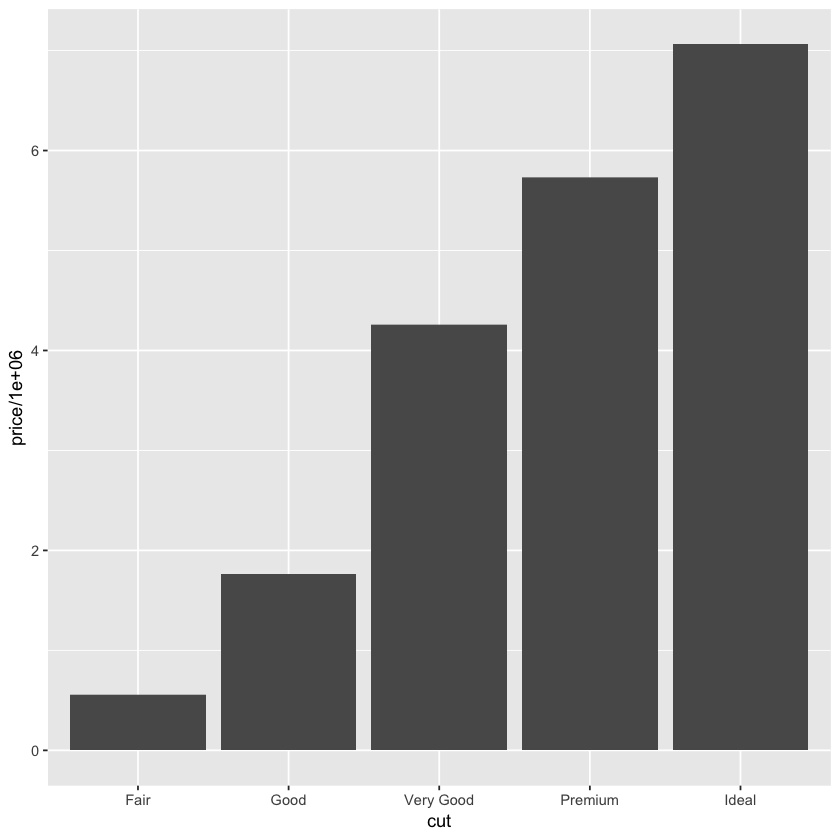

In [15]:
ggplot(data = dm) +
    geom_col(mapping = aes(x = cut, y = price / 1e6))

### Exercises

1. What does `geom_col()` do? How is it different to `geom_bar()`?
2. Most geoms and stats come in pairs that are almost always used in concert. Read through the documentation and make a list of all the pairs. What do they have in common? https://ggplot2.tidyverse.org/reference/
3. What variables does `stat_smooth()` compute? What parameters control its behaviour?
4. In our proportion bar chart, we need to set group = 1. Why? In other words, what is the problem with these two graphs?

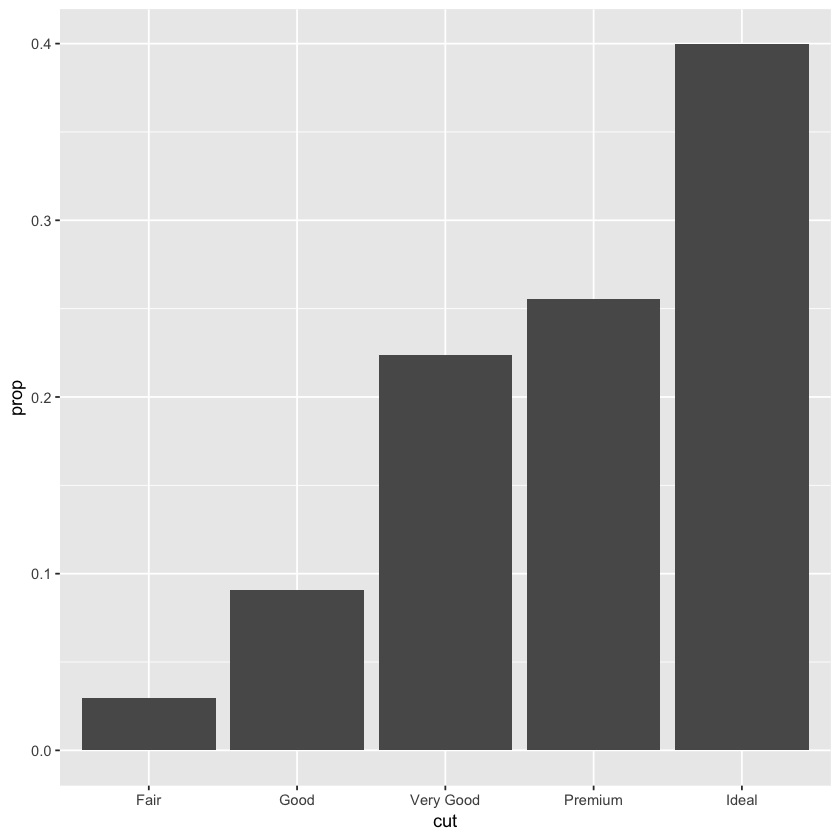

In [19]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = color, y = ..prop.., group=1))

## Position adjustments

In [ ]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

Remmeber that we can "color by" a different variable - in this case, clarity. By default, it stacks the bars for each clarity level. This is done using the positional adjustment specified by the position argument of geom_bar. If you don't want a stacked bar chart, you can use one of three other options: "identity", "dodge", or "fill".

![Caption for the picture.](./graph7.png)

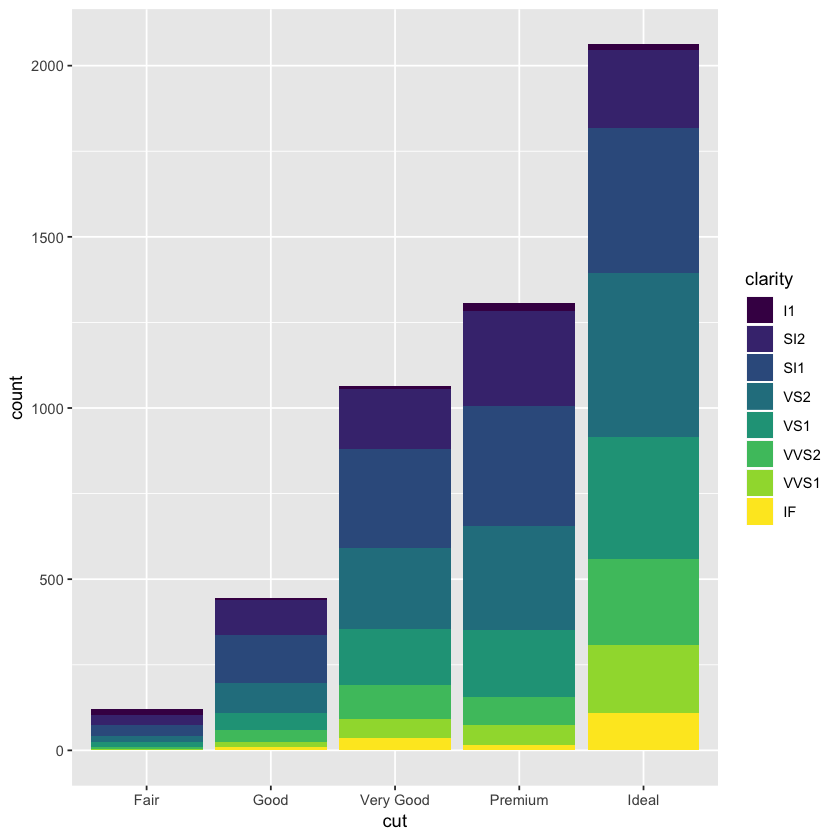

In [20]:
ggplot(data = dm) +
    geom_bar(mapping = aes(x = cut, fill = clarity)) # this "fill" is different from the following one.

*position 'fill'*
This works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

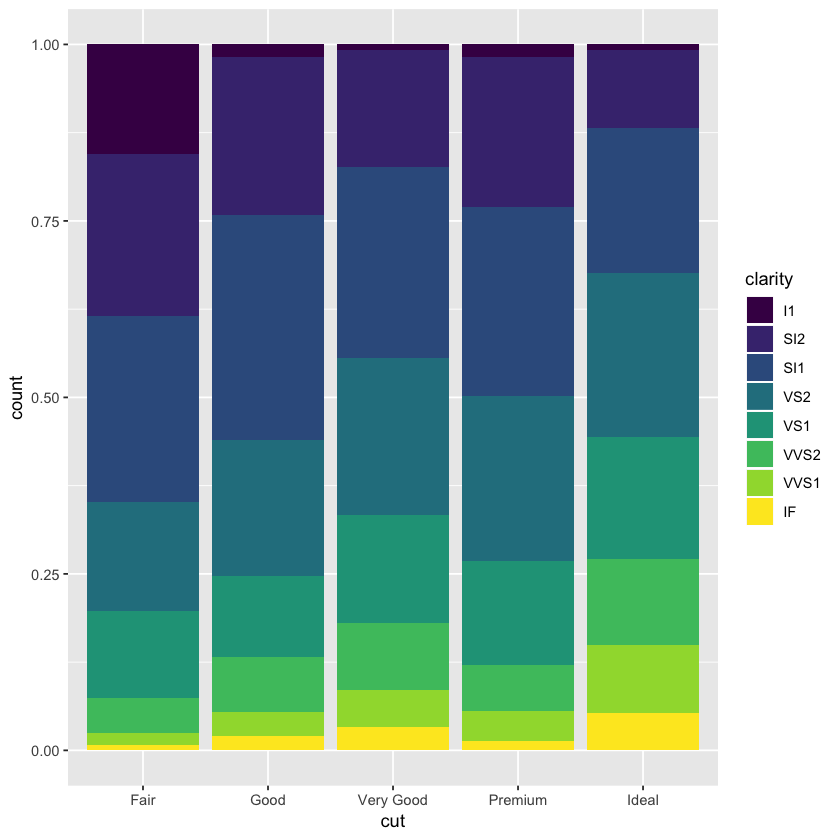

In [21]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

`position = 'dodge'`

This places overlapping objects directly beside one another, which makes it easier to compare individual values.

![Caption for the picture.](graph10.png)

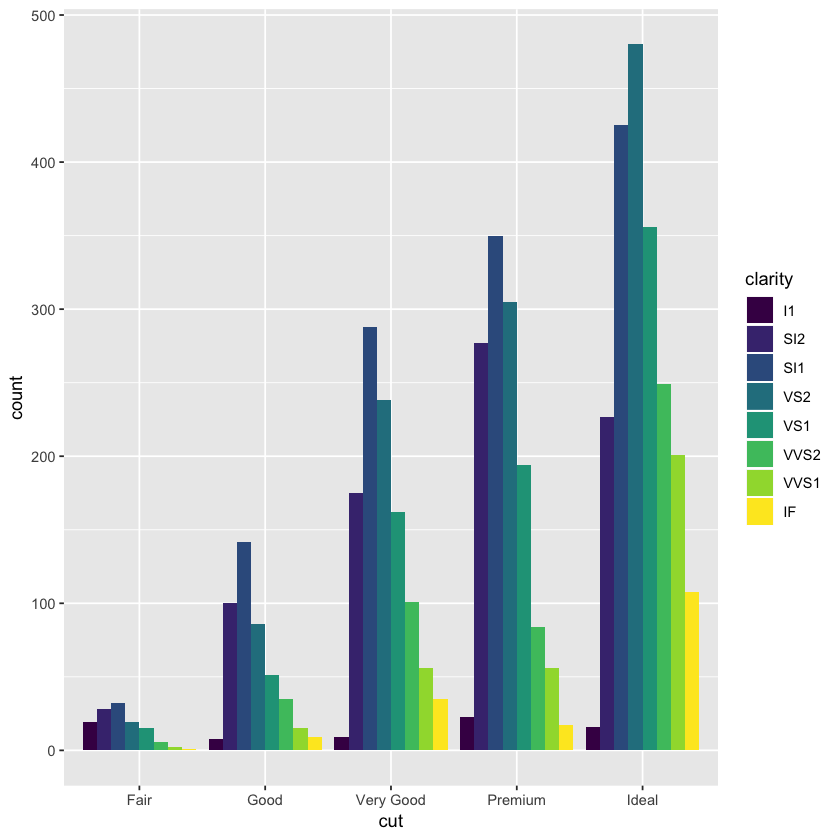

In [24]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

A positional adjustment that is very useful for scatterplots with overlaps is the 'jitter' argument.

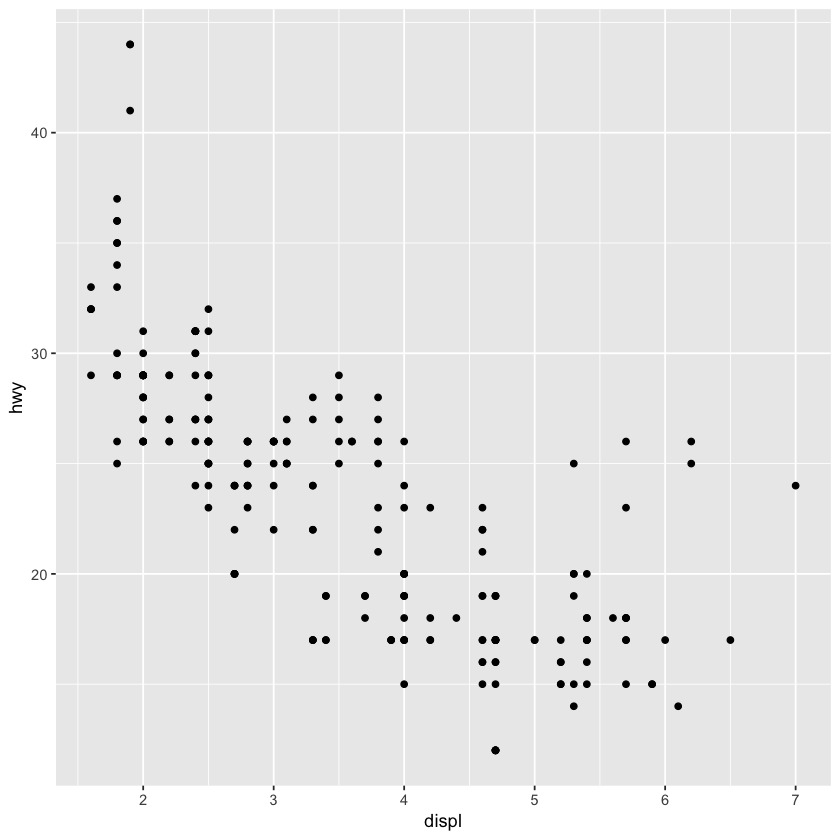

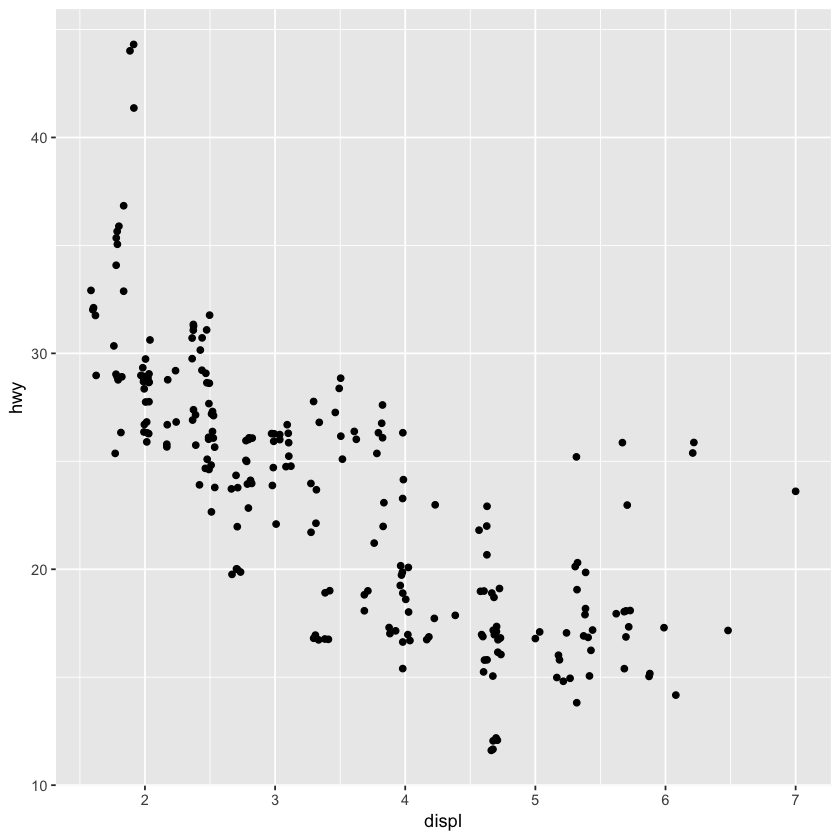

In [25]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")



# dplyr for data manipulation

In [26]:
dim(dm)
head(dm)

[1] 5000   10

carat,cut,color,clarity,depth,table,price,x,y,z
0.40,Very Good,H,SI1,62.6,58,666,4.68,4.72,2.94
0.78,Premium,F,SI1,62.3,57,2469,5.86,5.85,3.65
1.02,Premium,H,SI2,60.9,58,4113,6.53,6.41,3.94
0.50,Good,G,VS2,63.2,57,1410,4.99,5.04,3.17
0.32,Ideal,F,VVS1,61.5,56,947,4.44,4.45,2.73
0.70,Ideal,H,VS2,61.5,56,3038,5.71,5.73,3.52


Simply run `dm` after declaring the dm variable above. can you guess what `dbl`, `ord`, and `int` are?

Notice how the levels below follow an order. Indeed, we expect Fair < Good < Very Good < Premium < Ideal

In [28]:
print(levels(dm$cut))
print(levels(dm$color))
print(levels(dm$clarity))

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"    
[1] "D" "E" "F" "G" "H" "I" "J"
[1] "I1"   "SI2"  "SI1"  "VS2"  "VS1"  "VVS2" "VVS1" "IF"  


In [29]:
sizes = c("M", "S", "S", "M", "XL", "XXL", "XL", "S", "M", "L")
sizes

[1] "M"   "S"   "S"   "M"   "XL"  "XXL" "XL"  "S"   "M"   "L"

In [30]:
sizes = ordered(sizes, levels = c("S", "M", "L", "XL", "XXL"))
levels(sizes) # in R Studio, this will output the ordering explicitly with less-than signs

[1] "S"   "M"   "L"   "XL"  "XXL"

There are five functions in dplyr: filter, arrange, select, mutate and summarise. all of them have the following properties:
1. The first argument is a data frame.
2. The subsequent arguments describe what to do with the data frame, using the variable names (without quotes).
3. The result is a new data frame.

## Filter
Used if you want to view or store a new dataset containing a subset of the full dataset.

In [37]:
filter(dm,  color == 'J', cut == 'Fair')

carat,cut,color,clarity,depth,table,price,x,y,z
1.35,Fair,J,SI1,65.2,56,5524,6.90,7.02,4.54
0.77,Fair,J,VS1,61.2,66,2005,5.92,5.83,3.60
1.03,Fair,J,SI2,56.2,62,3246,6.73,6.69,3.77
2.01,Fair,J,VS1,66.6,54,14402,7.76,7.92,5.22
1.51,Fair,J,SI2,65.1,59,5801,7.13,7.09,4.63
2.72,Fair,J,I1,68.2,56,6870,8.46,8.43,5.76
1.45,Fair,J,SI2,58.6,68,4570,7.45,7.33,4.34
1.01,Fair,J,VS2,65.8,55,3190,6.29,6.24,4.12
1.05,Fair,J,SI2,65.8,59,2789,6.41,6.27,4.18
0.75,Fair,J,VS2,59.1,66,1944,5.99,5.82,3.49


Usually you want to store the newly subsetted data in memory. 

In [38]:
worst_diamonds = filter(dm, cut == 'Fair', color == 'J')

Make sure to use '==' instead of '='. The former is to test equality while the latter is for assignments. 

In [40]:
4 == 6 # false
test = 6 # assignment
test # print variable
test == 5 # false
test == 6 # true

[1] FALSE

[1] 6

[1] FALSE

[1] TRUE

## Use cases

In [43]:
a = filter(dm, color == 'D' | clarity=='VS2') 
# filtering for rows that satisfy one or both of the conditions

b = filter(dm, color == 'D' & color == 'J') 
# filtering for rows that satisfy both conditions

best_cuts = filter(dm, cut == 'Ideal') 
# filtering using membership condition

not_worst_cuts = filter(dm, cut > 'Fair') 
# can do this because cut is an ordinal variable

In [47]:
not_worst_cuts[1:10,]

carat,cut,color,clarity,depth,table,price,x,y,z
0.40,Very Good,H,SI1,62.6,58,666,4.68,4.72,2.94
0.78,Premium,F,SI1,62.3,57,2469,5.86,5.85,3.65
1.02,Premium,H,SI2,60.9,58,4113,6.53,6.41,3.94
0.50,Good,G,VS2,63.2,57,1410,4.99,5.04,3.17
0.32,Ideal,F,VVS1,61.5,56,947,4.44,4.45,2.73
0.70,Ideal,H,VS2,61.5,56,3038,5.71,5.73,3.52
0.59,Ideal,E,VVS2,61.0,58,2515,5.39,5.43,3.30
1.00,Good,E,SI2,63.3,55,4312,6.25,6.29,3.97
1.23,Ideal,J,SI1,63.1,58,4959,6.80,6.74,4.27
1.52,Very Good,F,SI2,62.3,59,8192,7.33,7.37,4.58


In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In [50]:
x = 4
# x == NA  
!is.na(x)

[1] TRUE

Similarly, never put an equality condition with NA in your dplyr filter() statements

In [51]:
# create a dataframe
df = tibble(x = c(1, NA, 3))
print(df)

# A tibble: 3 x 1
      x
  <dbl>
1     1
2    NA
3     3


In [52]:
filter(df, x>1)

x
3


In [57]:
filter(df, is.na(x) | x > 1)

x
NA
3


### Exercise
1. Write code using filter that will allow you to output diamonds with colors D or E and cuts Good or Very Good
2. Write code using filter that wil allow you to output diamonds with even-numbered prices

In [71]:
dm1a = filter(dm, (color == 'D' | color == 'E') & (cut == 'Good' | cut == 'Very Good'))
head(dm1a)

carat,cut,color,clarity,depth,table,price,x,y,z
1.00,Good,E,SI2,63.3,55,4312,6.25,6.29,3.97
0.50,Very Good,E,VVS2,59.3,56,2168,5.25,5.30,3.13
0.43,Very Good,E,VS1,61.9,53,1051,4.86,4.89,3.02
0.73,Very Good,E,VVS2,60.2,60,3565,5.81,5.85,3.51
1.51,Very Good,E,SI2,63.1,61,9343,7.25,7.30,4.59
0.91,Very Good,E,SI2,62.9,56,3763,6.14,6.17,3.87


In [75]:
dm2 = filter(dm, price %% 2 == 0)
head(dm2)

carat,cut,color,clarity,depth,table,price,x,y,z
0.40,Very Good,H,SI1,62.6,58,666,4.68,4.72,2.94
0.50,Good,G,VS2,63.2,57,1410,4.99,5.04,3.17
0.70,Ideal,H,VS2,61.5,56,3038,5.71,5.73,3.52
1.00,Good,E,SI2,63.3,55,4312,6.25,6.29,3.97
1.52,Very Good,F,SI2,62.3,59,8192,7.33,7.37,4.58
0.52,Ideal,E,SI2,61.8,57,1146,5.14,5.18,3.19


## Arrange
Useful for ordering rows instead of filtering for a subset of them

In [76]:
arrange(dm, cut, color)[1:10,] 
# can be done since clarity is an ordinal variable

carat,cut,color,clarity,depth,table,price,x,y,z
1.00,Fair,D,VS1,55.9,60,7083,6.77,6.71,4.38
1.51,Fair,D,SI2,64.7,57,9555,7.17,7.24,4.66
0.50,Fair,D,SI1,64.6,58,1323,5.00,4.97,3.22
1.00,Fair,D,SI1,66.3,58,4704,6.15,6.04,4.04
0.76,Fair,D,SI2,55.5,69,2518,6.16,6.07,3.39
0.91,Fair,D,I1,66.2,57,2491,6.00,5.94,3.95
1.01,Fair,D,SI1,64.4,61,5147,6.17,6.13,3.96
1.00,Fair,D,VVS1,56.7,68,10752,6.66,6.64,3.77
0.74,Fair,D,VVS2,65.4,53,4040,5.73,5.71,3.74
2.01,Fair,D,SI2,66.9,57,16086,7.87,7.76,5.23


In [77]:
# arranging in the descending order of cut and then carat
arrange(dm,desc(cut), desc(carat))[1:10,]

carat,cut,color,clarity,depth,table,price,x,y,z
2.40,Ideal,H,SI2,62.0,55,18374,8.57,8.60,5.32
2.30,Ideal,G,SI2,61.4,57,14744,8.51,8.48,5.22
2.28,Ideal,J,SI1,61.6,57,12755,8.50,8.43,5.21
2.26,Ideal,I,SI1,62.4,57,16904,8.43,8.37,5.24
2.25,Ideal,I,SI2,60.5,56,16575,8.49,8.54,5.15
2.24,Ideal,H,SI2,61.4,56,16300,8.38,8.43,5.16
2.22,Ideal,I,VS2,61.3,56,18531,8.45,8.36,5.15
2.22,Ideal,G,SI2,62.6,57,14637,8.35,8.29,5.21
2.20,Ideal,I,SI1,61.7,55,18059,8.41,8.37,5.18
2.17,Ideal,I,SI1,60.4,56,17224,8.36,8.43,5.07


Missing values are always sorted at the end:

In [80]:
df = tibble(x = c(5, NA, 2))
arrange(df, x)

x
2
5
NA


In [81]:
arrange(df, desc(x))

x
5
2
NA


### Exercise
1. Use arrange to sort the dm dataset by describing order of the product of the x, y, and z variables. Output the first 20 rows of the new dataset.

## Select
This is used to reduce the number of columns that we're dealing with

In [82]:
names(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [83]:
select(dm, carat, price)[1:10,]

carat,price
0.40,666
0.78,2469
1.02,4113
0.50,1410
0.32,947
0.70,3038
0.59,2515
1.00,4312
1.23,4959
1.52,8192


In [84]:
select(dm, carat:price)[1:10,]

carat,cut,color,clarity,depth,table,price
0.40,Very Good,H,SI1,62.6,58,666
0.78,Premium,F,SI1,62.3,57,2469
1.02,Premium,H,SI2,60.9,58,4113
0.50,Good,G,VS2,63.2,57,1410
0.32,Ideal,F,VVS1,61.5,56,947
0.70,Ideal,H,VS2,61.5,56,3038
0.59,Ideal,E,VVS2,61.0,58,2515
1.00,Good,E,SI2,63.3,55,4312
1.23,Ideal,J,SI1,63.1,58,4959
1.52,Very Good,F,SI2,62.3,59,8192


In [85]:
select(dm, -(carat:price))[1:10,]

x,y,z
4.68,4.72,2.94
5.86,5.85,3.65
6.53,6.41,3.94
4.99,5.04,3.17
4.44,4.45,2.73
5.71,5.73,3.52
5.39,5.43,3.30
6.25,6.29,3.97
6.80,6.74,4.27
7.33,7.37,4.58


Use `rename()`, which is a variant of `select()`, to rename a column and keep all the variables that aren't explicitly mentioned:

In [86]:
rename(dm, width=x)[1:10,]

carat,cut,color,clarity,depth,table,price,width,y,z
0.40,Very Good,H,SI1,62.6,58,666,4.68,4.72,2.94
0.78,Premium,F,SI1,62.3,57,2469,5.86,5.85,3.65
1.02,Premium,H,SI2,60.9,58,4113,6.53,6.41,3.94
0.50,Good,G,VS2,63.2,57,1410,4.99,5.04,3.17
0.32,Ideal,F,VVS1,61.5,56,947,4.44,4.45,2.73
0.70,Ideal,H,VS2,61.5,56,3038,5.71,5.73,3.52
0.59,Ideal,E,VVS2,61.0,58,2515,5.39,5.43,3.30
1.00,Good,E,SI2,63.3,55,4312,6.25,6.29,3.97
1.23,Ideal,J,SI1,63.1,58,4959,6.80,6.74,4.27
1.52,Very Good,F,SI2,62.3,59,8192,7.33,7.37,4.58


In [87]:
select(dm, width = x)[1:10,]

width
4.68
5.86
6.53
4.99
4.44
5.71
5.39
6.25
6.80
7.33


Another option is to use `select()` in conjunction with the `everything()` helper. This is useful if you have a handful of variables you would like to move to the start of the dataframe

In [88]:
select(dm, price, carat, everything())[1:10,]

price,carat,cut,color,clarity,depth,table,x,y,z
666,0.40,Very Good,H,SI1,62.6,58,4.68,4.72,2.94
2469,0.78,Premium,F,SI1,62.3,57,5.86,5.85,3.65
4113,1.02,Premium,H,SI2,60.9,58,6.53,6.41,3.94
1410,0.50,Good,G,VS2,63.2,57,4.99,5.04,3.17
947,0.32,Ideal,F,VVS1,61.5,56,4.44,4.45,2.73
3038,0.70,Ideal,H,VS2,61.5,56,5.71,5.73,3.52
2515,0.59,Ideal,E,VVS2,61.0,58,5.39,5.43,3.30
4312,1.00,Good,E,SI2,63.3,55,6.25,6.29,3.97
4959,1.23,Ideal,J,SI1,63.1,58,6.80,6.74,4.27
8192,1.52,Very Good,F,SI2,62.3,59,7.33,7.37,4.58


There are some helper functions for `select()`:
    `starts_with()`
    `ends_with()`
    `contains()`
    
### Exercise:
1. Write code that wil have price as the first column and the columns starting with the letter 'c' as the following columns. Output the first 20 rows of such a datset.

### Mutate
to create a computed column

In [89]:
dm_dimensions = select(dm, 
  -(carat:price)
)
mutate(dm_dimensions,
  volume = round(x*y*z, 2)
)[1:10,]

x,y,z,volume
4.68,4.72,2.94,64.94
5.86,5.85,3.65,125.13
6.53,6.41,3.94,164.92
4.99,5.04,3.17,79.72
4.44,4.45,2.73,53.94
5.71,5.73,3.52,115.17
5.39,5.43,3.30,96.58
6.25,6.29,3.97,156.07
6.80,6.74,4.27,195.70
7.33,7.37,4.58,247.42


If you only want to keep the new variables, use transmute()

In [90]:
transmute(dm_dimensions, 
          volume = x*y*z)[1:10,]

volume
64.94342
125.12565
164.91776
79.72423
53.93934
115.16842
96.58341
156.07063
195.70264
247.42122



## Summarise
Generally used in concert with `group_by()` function to output summaries by group. Group summaries are seen in many applications

In [91]:
by_color = group_by(dm, color)
summarise(by_color, avg_price = mean(price, na.rm = TRUE))

color,avg_price
D,3210.035
E,3192.363
F,3808.838
G,3838.339
H,4330.551
I,4940.798
J,4816.326


In [92]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [93]:
mpg2 = mpg
mpg2$year = as.factor(mpg$year) # telling it we're dealing with a category column
mpg2 = mutate(mpg2, manual = (grepl('manual', trans)))
head(mpg2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,manual
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,FALSE
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,TRUE
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,TRUE
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,FALSE
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,FALSE
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,TRUE


In [94]:
by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarise(by_maker_yr,
                       count = n(),
                       hwy = mean(hwy, na.rm = TRUE),
                       cty = mean(cty, na.rm = TRUE))
hwy_summary[1:10,]

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000
honda,1999,5,31.60000,24.80000
honda,2008,4,33.75000,24.00000


In [97]:
hwy_summary_ag = filter(hwy_summary, substring(manufacturer,1,1) %in% c('a','b','c','d', 'm'))
hwy_summary_ag

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
mercury,1999,2,17.00000,13.50000
mercury,2008,2,19.00000,13.00000


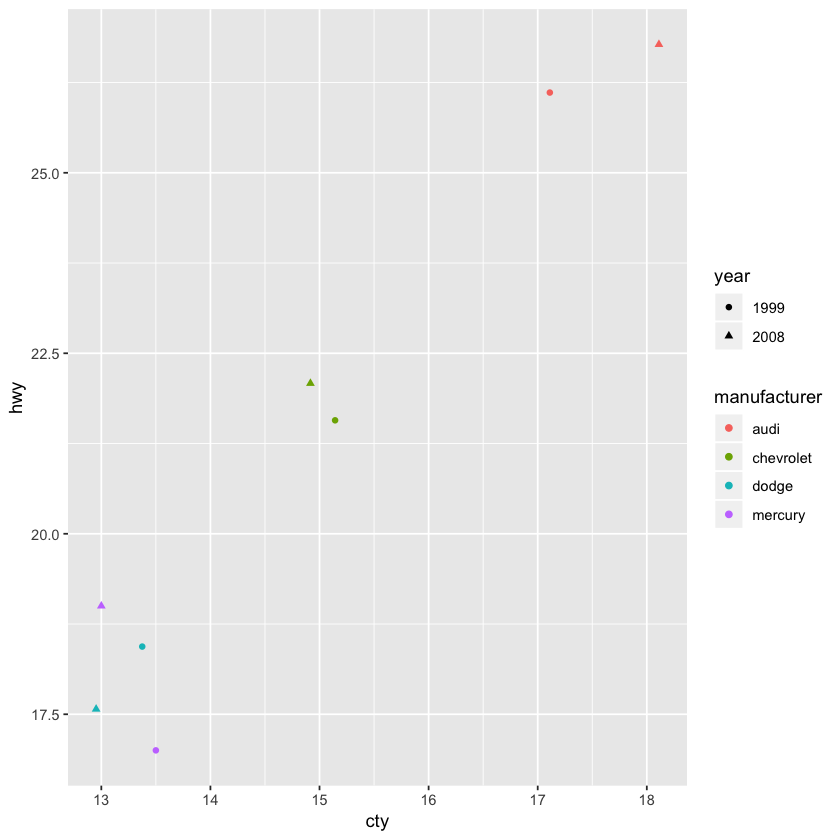

In [98]:
ggplot(data = hwy_summary_ag, mapping = aes(x = cty, y = hwy)) + 
geom_point(mapping = aes(color = manufacturer, shape = year))

## Pipes
The transformations above can be written as:


In [99]:
hwy_summary_ag2 = mpg2 %>% 
group_by(manufacturer, year) %>%
summarise(
    count = n(),
    hwy = mean(hwy, na.rm = TRUE),
    cty = mean(cty, na.rm = TRUE)) %>%
filter(substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))

In [100]:
hwy_summary_ag2

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000
